# QSVM mini project

In this project, we implement the QSVM algorithm to a classification problem for a given dataset.  We construct quantum kernels which then gets incorporated into the classical SVM pipeline. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC

## Data

In [2]:
train_features = np.load('train_features.npy')
train_labels = np.load('train_labels.npy')
test_features = np.load('test_features.npy')
test_labels = np.load('test_labels.npy')
adhoc_total = np.load('adhoc_total.npy')

In [3]:
def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label,
    )


def plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):

    plt.figure(figsize=(5, 5))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(
        np.asmatrix(adhoc_total).T,
        interpolation="nearest",
        origin="lower",
        cmap="RdBu",
        extent=[0, 2 * np.pi, 0, 2 * np.pi],
    )

    # A train plot
    plot_features(plt, train_features, train_labels, 0, "s", "w", "b", "A train")

    # B train plot
    plot_features(plt, train_features, train_labels, 1, "o", "w", "r", "B train")

    # A test plot
    plot_features(plt, test_features, test_labels, 0, "s", "b", "w", "A test")

    # B test plot
    plot_features(plt, test_features, test_labels, 1, "o", "r", "w", "B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    plt.title("Ad hoc dataset")

    plt.show()

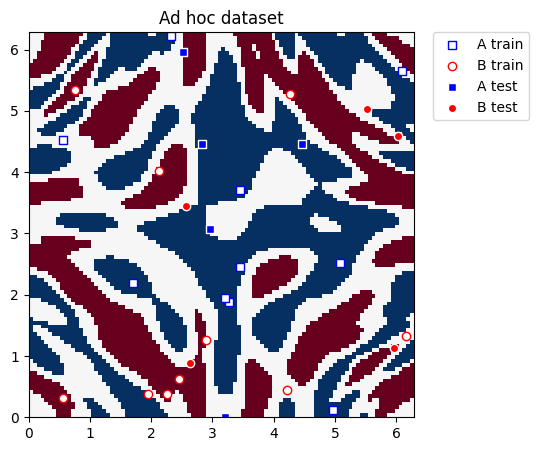

In [4]:
plot_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

In [5]:
# classical kernel options :  'rbf', ‘linear’, ‘poly’,‘sigmoid’, ‘precomputed’
# default: 'rbf'svc_cl = SVC(kernel='sigmoid')

svc_cl = SVC()
svc_cl.fit(train_features, train_labels)
score_test_cl = svc_cl.score(test_features, test_labels)

print(score_test_cl)
print(svc_cl.predict(test_features))
print(test_labels)

0.5
[0 1 0 0 0 0 0 0 0 1]
[0 0 0 0 0 1 1 1 1 1]


## Task Description
Implement QSVM with the data given above when the quantum kernels from `ZZFeatureMap` are constructed using Case 1) `Qiskit Primitive Sampler`, Case 2) Qiskit IBM Runtime Sampler on `ibmq_qasm_simulator` with the **noise model** for the IBM Quantum system of your choice and finally Case 3) Qiskit IBM Runtime Sampler on the `IBM Quantum system` that you choose.

We need to build two quantum kernels for each case. The first quantum Kernal is a similarity matrix between the quantum states corresponding to the train_feature vectors and it is used to determine the SVC classifier. The second Kernel represents similarities between the quantum states associated to the test_feature vectors and the ones for the train feature vectors. The second kernel is provided when we compare the performance of the classifiers built from these three different samplers using the test data.  

The following variable names are used to refer to the two kernels for three cases accordingly.

- Case 1) `Qkernel_train_ideal` $~~~~~$ `Qkernel_test_ideal`
- Case 2) `Qkernel_train_noiseSim` $~~~~~$ `Qkernel_test_noiseSim`
- Case 3) `Qkernel_train_real` $~~~~~$ `Qkernel_test_real`

Once the two kernels are formed in each case, execute the precoded cells below to test the classifiers.

### QSVC - Ideal

In [3]:
qsvc_ideal = SVC(kernel="precomputed")
qsvc_ideal.fit(Qkernel_train_ideal, train_labels)
score_qsvc_ideal = qsvc_ideal.score(Qkernel_test_ideal, test_labels)

print(score_qsvc_ideal)
print(qsvc_ideal.predict(Qkernel_test_ideal))
print(test_labels)

### QSVC - Noise Simulation

In [1]:
qsvc_noiseSim = SVC(kernel="precomputed")
qsvc_noiseSim.fit(Qkernel_train_noiseSim, train_labels)
score_qsvc_noiseSim = qsvc_noiseSim.score(Qkernel_test_noiseSim, test_labels)

print(score_qsvc_noiseSim)
print(qsvc_noiseSim.predict(Qkernel_test_noiseSim))
print(test_labels)

### QSVC - Real Quantum System

In [2]:
qsvc_real = SVC(kernel="precomputed")
qsvc_real.fit(Qkernel_train_real, train_labels)
score_qsvc_real = qsvc_real.score(Qkernel_test_real, test_labels)

print(score_qsvc_real)
print(qsvc_real.predict(Qkernel_test_real))
print(test_labels)